<a href="https://colab.research.google.com/github/Advanced-Data-Science-TU-Berlin/Data-Science-Training-Python-Part-2/blob/main/notebooks/2_1_visualization_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Vaccines Analysis
Many vaccines have been introduced so far to fight covid-19. No vaccine has guaranteed 100% accuracy so far, but most manufacturing companies claim their vaccine is not 100% accurate, but still, it will save your life by giving you immunity.

Thus, each country tries to vaccinate a large part of its population so as not to depend on a single vaccine. That’s what we are going to analyze in this exercise, which is how many vaccines each country is using to fight covid-19. 

We used the data from Kaggle dataset [here](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress). Feel free to navigate through data and its columns.

Let's get the data first.

In [ ]:
!pip install opendatasets
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahnaznmz
Your Kaggle Key: ··········


100%|██████████| 1.94M/1.94M [00:00<00:00, 85.2MB/s]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline
# Load the data into Pandas DataFrame
df = pd.read_csv("/content/covid-world-vaccination-progress/country_vaccinations.csv")
# Look at first few rows
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


As we can see te dataset has columns like `country`, `iso_code`, `date`, `total_vaccinations`, `people_vaccinated`, `people_fully vaccinated`, etc.

An initial look at the above table shows that data has `null values` too. We will deal with null values later.

When we have so many columns usually `info()` function is used to get the overview of data like data type of feature, a number of null values in each column, and many more.

In [ ]:
# Get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

The above results shows that there are many null values in our dataset which we are going to deal with these null values later. There are two data types as seen from the table object means string and float.

In [ ]:
# Total count of null values
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

## Data Cleaning
When we are dealing with real datasets we have to make sure about data quality before starting any type of analysis.
Here we are going through some of the necessary data cleaning steps: 

In [ ]:
# Simply replacing null values with 0
df.fillna(value = 0, inplace = True)
# Convering Floats to Int cause they are count values
for column, dtype in df.dtypes.items():
  if dtype=='float64':
    df[column] = df[column].astype(int)
# Extract Year, Month and Day from the date into separate columns
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

### Basic Statistics
Let's look at few statistics from the data:

In [ ]:
print("Number of countries:", df.country.nunique())
print("Number of vaccines:", df.vaccines.nunique())
print(f"Data range from {df.date.min()} to {df.date.max()}")

Number of countries: 223
Number of vaccines: 84
Data range from 2020-12-02 to 2022-03-29


## Total Vaccines per Country

Let's calcualte and take a look at the countries and their corresponding total number of vaccines to answer:
 - what are the top countries based on the total vaccines?

In [ ]:
# Calculate total number of vaccines per country
#   - Group data by country
#   - Select the field
#   - Get maximum value of the field per group
#   - Sort Descending
countries_total_vaccines_df = df.groupby('country') \
  .total_vaccinations \
  .max() \
  .sort_values(ascending=False)
# Print top countries with highest number of vaccines
print(countries_total_vaccines_df.head())

country
China            3263129000
India            1834500657
United States     560181791
Brazil            413559595
Indonesia         377108938
Name: total_vaccinations, dtype: int64


## Bar Plot
We can use bar plot to show top countries with most vaccines. This plot will provide us with more details on how many vaccinations each country has so far in comparison to others.

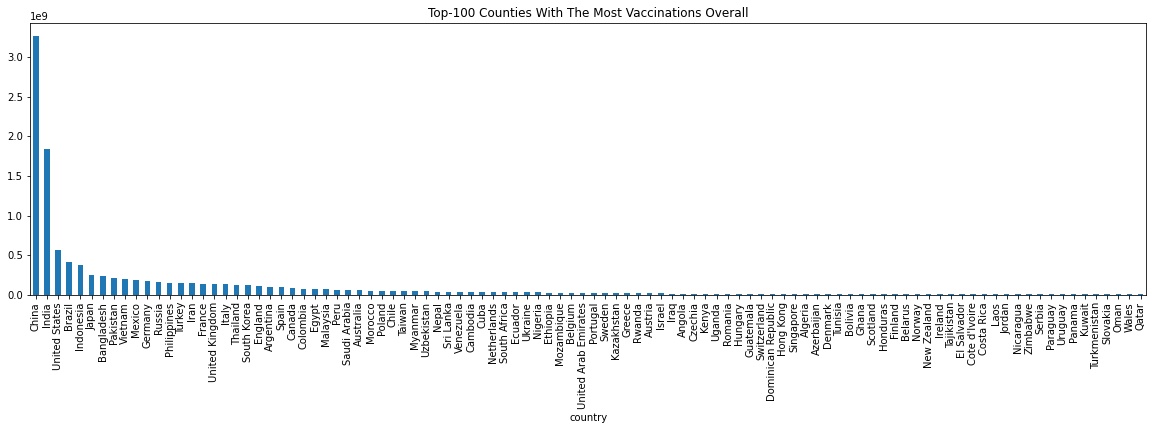

In [ ]:
# Top-100 countries
ax_ = countries_total_vaccines_df \
  .iloc[:100] \
  .plot.bar(figsize=(20,5))
_ = ax_.set_title("Top-100 Counties With The Most Vaccinations Overall")

## Word Art of Countries
Word Cloud is a unique way to get information from our dataset. The words are shown in the form of art where the size proportional depends on how much the particular word repeated in the dataset. This is made by using the WordCloud library. 

Here we are showing the country names based on their total vaccinations

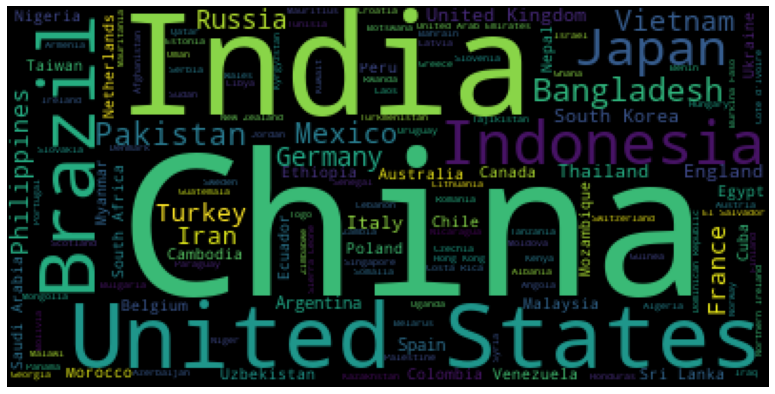

In [ ]:
from wordcloud import WordCloud
# Conver to Dictionary
countries_total_vaccines = countries_total_vaccines_df \
  .to_dict() 
# Create WordCloud of country names using their total vaccines
wc = WordCloud()
wc.generate_from_frequencies(countries_total_vaccines)
# Plot the word cloud
plt.figure(figsize=(15,7))
plt.axis('off')
# Plot the output of WorlCloud which is an image
plt.imshow(wc)
plt.show()

## Vaccination Trend

### Line Plot
In order to check what is the vaccination trend in each country, we are drawing the line plot where the x-axis is the date and the y-axis is the count of daily vaccination, Colours Is set to be the country.

### Plotly
Let's use `plotly` another useful python package for visualization.
This package will provide us with an `interactive` plot which you can cross-over and see more detailed information regarding individual points on the plot.

In [ ]:
import plotly.express as px
# Plot an interactive line plot
fig = px.line(df, x='date', y='daily_vaccinations', color='country')
# Set the title
fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95, # Proportion from the bottom
            'x':0.5 # Proportion from the left
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
# Show the plot
fig.show()


As we can see, there is a mixed kind of trend among each country. Sometimes a particular country shows a positive trend and sometimes it shows a negative trend.

## Missing Values in Cumulative Fields
Previously we simply replaced the missing values with 0. Let's take a look at what does it mean to have zeros in a field that aggregates over time (cumulative field):

Let's consider the total number of people being vaccinated (people_vaccinated column). We expect this value to aggregate and increase over time. If we don't have the value for one specific date (NULL value) what does it mean? Does it mean that we took back the vaccination from the people who had already been vaccined!? :D I don't think so! 

In worth case scenario, we can assume that there were no new vaccines on that day this will keep the value of the field the same as before.

So let's replace the zero values with the existing previous value for the `people_vaccinated` column and see the difference for a sample country that has missing values:

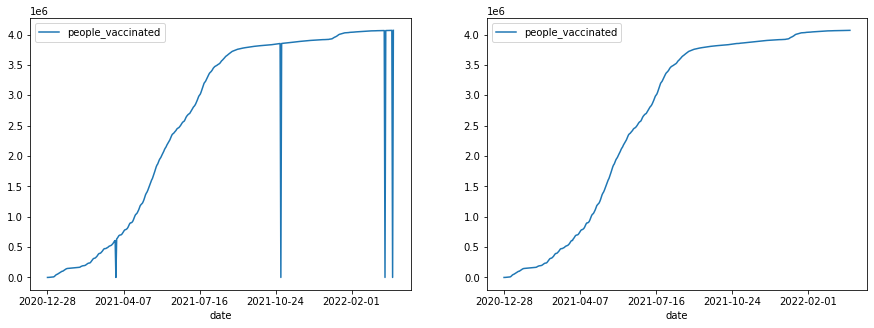

In [ ]:
# Sample country with missing values
country = 'Ireland'
# Sample cumulative column with missing values
column = 'people_vaccinated'
# Select the data only for the given country and field
selected_df = df.query(f"country=='{country}'")[['date', column]]
# Create a plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
# Plot the data with missing values
selected_df.plot(x='date', y=column, ax=ax[0])
# replace the zeros with ffill which propagates last valid observation forward to next valid backfill
no_missing_df = selected_df.replace(to_replace=0, method='ffill')
# Plot the data without missing values
no_missing_df.plot(x='date', y=column, ax=ax[1])

## People Vaccinated VS Fully Vaccinated
Now let’s try to compare two fields with each other. For example, let's analyze how many people vaccinated vs the people which are fully vaccinated in a country (EX. Germany)



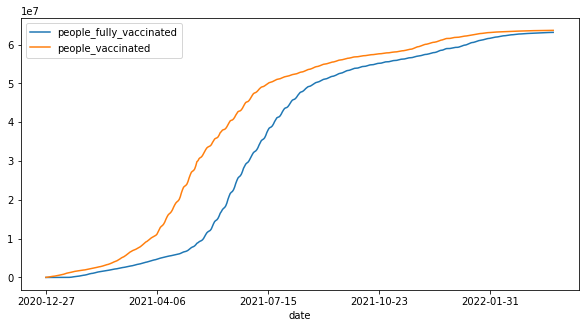

In [ ]:
# Select the Country
country = 'Germany'
# Select the columns to compare
column_1 = 'people_fully_vaccinated'
column_2 = 'people_vaccinated'
# Select the data only for the given country and fields
selected_df = df.query(f"country=='{country}'")[['date', column_1, column_2]]
# Replace zeros using ffill method
no_missing_df =  selected_df \
  .replace(to_replace=0, method='ffill')

# Plot the data
fig, ax = plt.subplots(figsize=(10,5))
no_missing_df.plot(x='date', ax=ax)

Can you interpret this?

Let's use the graph_objects from `plotly` which uses scatter plots and `stackgroup` to stack these two plots together:

In [ ]:
import plotly.graph_objects as go

plot = go.Figure(data=[
            go.Scatter( # First plot based on first column
              x = no_missing_df['date'], 
              y = no_missing_df[column_1],
              stackgroup='one', # set a stackgroup name
              name = column_1,
              marker_color= 'orange'),
            go.Scatter( # Second plot based on second column
              x = no_missing_df['date'],
              y = no_missing_df[column_2],
              stackgroup='one', # use the same stackgroup name as the previous
              name = column_2,
              marker_color= 'blue')
            ]) 
plot.update_layout(
    title={
            'text': f'People vaccinated vs Fully vaccinated till date in {country}',
            'y':0.95,
            'x':0.5
        },
        xaxis_title="Date"
    )
plot.show()

As we can see there are around 60M people fully vaccinated in Germany.

## Comparison Fully Vaccinated Between 2 Countries:
Now let's compare the number of fully vaccinated people between two countries (Ex. Germany vs France)

In [ ]:
# Select countries
country_1 = 'Germany'
country_2 = 'France'
# Select the column
column = 'people_fully_vaccinated_per_hundred'
# Select data for target countries for comparison
selected_df = df \
  .query(f"country=='{country_1}' or country=='{country_2}'") \
  [['date', 'country', column]]
# Plot two countries data in one plot
fig = px.line(selected_df, x='date', y=column, color='country')
fig.update_layout(
    title={
            'text': f"{column} - {country_1} vs {country_2}",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title=column
)
fig.show()

As we can see both countries had rather similar pace on number of fully vaccinated people untill May 2021 then we can see that Germany moved faster up to September 21 and then France had increased but both are following same pattern.

## Point Map
Now let's see how vaccinations are going in different countries using maps. The sizes are corresponding to `people_vaccinated_per_hundred` and different colors has been used for different countries.

In [ ]:
# Select column
column = "people_vaccinated_per_hundred"
# Find last available date in our data
captured_date = df.date.max()
print("Last date:", captured_date)
# Select max values per countries
selected_df = df \
  .groupby(["country", "iso_code"], as_index=False)[column] \
  .max()
# Plot data on map
fig = px.scatter_geo(selected_df,
                     locations="iso_code",
                     color="country", # which column to use to set the color of markers
                     hover_name="country", # column added to hover information
                     size=column, # size of markers
                     projection="natural earth")
fig.show()

Last date: 2022-03-29


## Choropleth Map
 Let's look at the same data but in a slightly different view using `choroplethmap`

In [ ]:
px.choropleth(selected_df,
              locations="iso_code",
              locationmode='ISO-3',
              color=column, # colors shade based on the field value
              hover_name="country", # column added to hover information
              color_continuous_scale=px.colors.sequential.Blues)

Usefull links:
- https://www.analyticsvidhya.com/blog/2021/05/analyze-covid-vaccination-progress-using-python/
- https://thecleverprogrammer.com/2021/04/13/covid-19-vaccines-analysis-with-python/